In [74]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Lets scrap the quotes data from a random website

In [17]:

res = requests.get("https://www.ef.com/wwen/english-resources/english-quotes/famous/") # random quotes website

soup = BeautifulSoup(res.text, 'html.parser')

all_rows = soup.find_all("tr")

all_row_data = []

for row in all_rows:
  row_data = {}

  for index, cell in enumerate(row.find_all("td")):
    label = "quote" if index == 0 else "autor" if index==1 else "language"

    row_data[label]=cell.get_text()

  all_row_data.append(row_data)

len(all_row_data)

59

### Lets covert scrapped data into the dataframe

In [18]:
df = pd.DataFrame(all_row_data)

df.head()

,quote,autor,language
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,\n\t\t\t\tA rose by any other name would smell...,\n\t\t\t\tWilliam Shakespeare,\n\t\t\t\tEnglish
3,\n\t\t\t\tAll that glitters is not gold.,\n\t\t\t\tWilliam Shakespeare,\n\t\t\t\tEnglish
4,"\n\t\t\t\tAll the worldâs a stage, and all t...",\n\t\t\t\tWilliam Shakespeare,\n\t\t\t\tEnglish


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   quote     57 non-null     object
 1   autor     57 non-null     object
 2   language  57 non-null     object
dtypes: object(3)
memory usage: 1.5+ KB


In [20]:
df.isnull().sum()

,0
quote,2
autor,2
language,2


In [21]:
df.describe()

,quote,autor,language
count,57,57,57
unique,57,46,5
top,\n\t\t\t\tA rose by any other name would smell...,\n\t\t\t\tWilliam Shakespeare,\n\t\t\t\tEnglish
freq,1,6,47


In [22]:
df.columns

Index(['quote', 'autor', 'language'], dtype='object')

In [23]:
df["author"] = df["autor"]
df.columns

Index(['quote', 'autor', 'language', 'author'], dtype='object')

### Lets clean the data

In [55]:
clean_df = df.drop("autor", axis=1, inplace=False)

In [56]:
clean_df.columns

Index(['quote', 'language', 'author'], dtype='object')

In [57]:
clean_df.head()

,quote,language,author
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,\n\t\t\t\tA rose by any other name would smell...,\n\t\t\t\tEnglish,\n\t\t\t\tWilliam Shakespeare
3,\n\t\t\t\tAll that glitters is not gold.,\n\t\t\t\tEnglish,\n\t\t\t\tWilliam Shakespeare
4,"\n\t\t\t\tAll the worldâs a stage, and all t...",\n\t\t\t\tEnglish,\n\t\t\t\tWilliam Shakespeare


In [58]:
clean_df = clean_df.dropna()

In [59]:
clean_df.head()

,quote,language,author
2,\n\t\t\t\tA rose by any other name would smell...,\n\t\t\t\tEnglish,\n\t\t\t\tWilliam Shakespeare
3,\n\t\t\t\tAll that glitters is not gold.,\n\t\t\t\tEnglish,\n\t\t\t\tWilliam Shakespeare
4,"\n\t\t\t\tAll the worldâs a stage, and all t...",\n\t\t\t\tEnglish,\n\t\t\t\tWilliam Shakespeare
5,\n\t\t\t\tAsk not what your country can do for...,\n\t\t\t\tEnglish,\n\t\t\t\tJohn Kennedy
6,"\n\t\t\t\tAsk, and it shall be given you; seek...",\n\t\t\t\tGreek,\n\t\t\t\tthe Bible


In [67]:
for col in clean_df.columns:
  clean_df[col] = clean_df[col].apply(lambda x: x.strip() if isinstance(x, str) else x)

clean_df.head()

,quote,language,author
2,A rose by any other name would smell as sweet.,English,William Shakespeare
3,All that glitters is not gold.,English,William Shakespeare
4,"All the worlds a stage, and all the men and wo...",English,William Shakespeare
5,Ask not what your country can do for you; ask ...,English,John Kennedy
6,"Ask, and it shall be given you; seek, and you ...",Greek,the Bible


In [68]:
clean_df = clean_df.reset_index()

In [69]:
clean_df.head()

,index,quote,language,author
0,2,A rose by any other name would smell as sweet.,English,William Shakespeare
1,3,All that glitters is not gold.,English,William Shakespeare
2,4,"All the worlds a stage, and all the men and wo...",English,William Shakespeare
3,5,Ask not what your country can do for you; ask ...,English,John Kennedy
4,6,"Ask, and it shall be given you; seek, and you ...",Greek,the Bible


In [72]:
clean_df = clean_df.drop("index", axis=1)

In [73]:
clean_df.head()

,quote,language,author
0,A rose by any other name would smell as sweet.,English,William Shakespeare
1,All that glitters is not gold.,English,William Shakespeare
2,"All the worlds a stage, and all the men and wo...",English,William Shakespeare
3,Ask not what your country can do for you; ask ...,English,John Kennedy
4,"Ask, and it shall be given you; seek, and you ...",Greek,the Bible


### Lets find trend in data

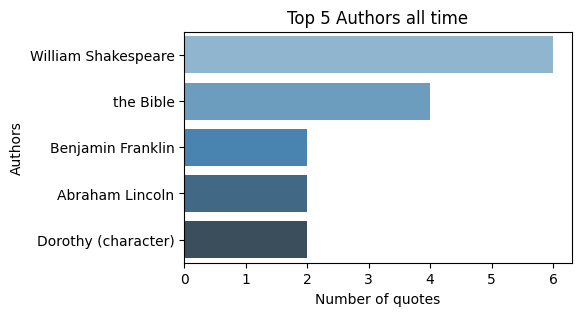

In [81]:
# Plot Top 5 Authors

top_authors = clean_df["author"].value_counts().head(5)

x = top_authors.values
y = top_authors.index

plt.figure(figsize=(5,3))

sns.barplot(x=x, y=y, palette="Blues_d")

plt.title("Top 5 Authors all time")
plt.xlabel("Number of quotes")
plt.ylabel("Authors")

plt.show()

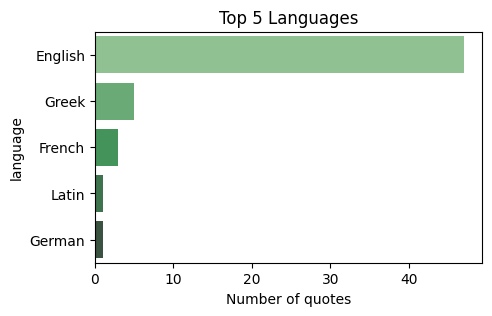

In [82]:
# Plot Top 5 Languages

top_languages = clean_df["language"].value_counts().head(5)

x= top_languages.values
y= top_languages.index

plt.figure(figsize=(5,3))

sns.barplot(x=x,y=y, palette="Greens_d")

plt.title("Top 5 Languages")
plt.xlabel("Number of quotes")
plt.ylabel("language")

plt.show()

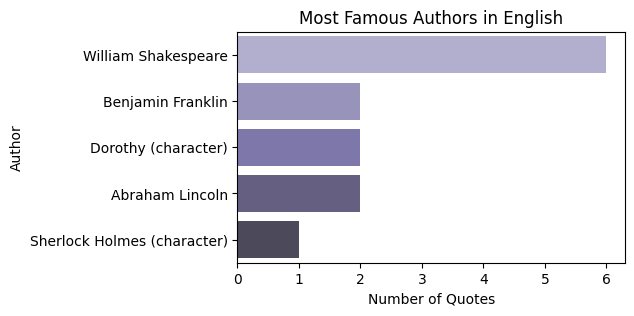

In [94]:
#Find Most Famous Authors in Top 1 Language

top_language = clean_df['language'].value_counts().idxmax()

top_lang_df = clean_df[clean_df['language'] == top_language]

famous_authors = top_lang_df['author'].value_counts().head(5)

x= famous_authors.values
y = famous_authors.index

plt.figure(figsize=(5, 3))

sns.barplot(x=x, y=y, palette="Purples_d")

plt.title(f"Most Famous Authors in {top_language}")
plt.xlabel("Number of Quotes")
plt.ylabel("Author")
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


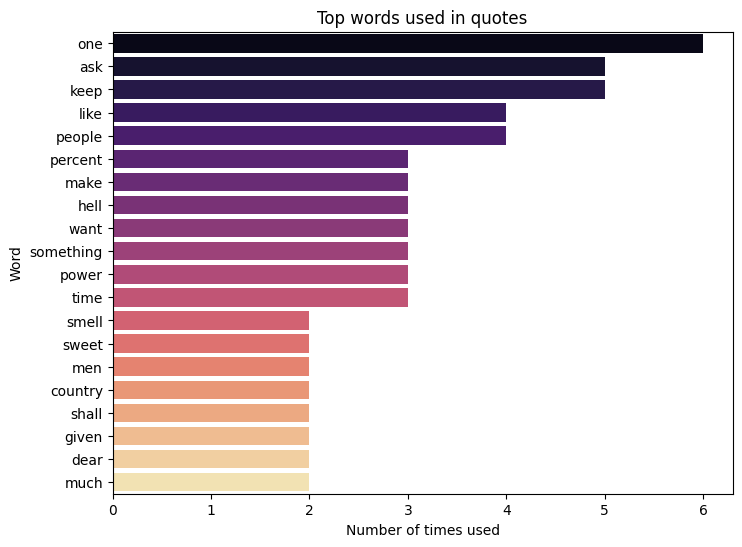

In [95]:
# Plot Word Frequency in quote Column

from collections import Counter
import nltk
import re

nltk.download('stopwords')
from nltk.corpus import stopwords

all_words = " ".join(clean_df['quote'].dropna().astype(str)).lower()

words = re.findall(r'\b\w+\b', all_words)

filtered_words = [word for word in words if word not in stopwords.words('english')]

word_counts = Counter(filtered_words).most_common(20)

words_df = pd.DataFrame(word_counts, columns=["word", "count"])

plt.figure(figsize=(8,6))

sns.barplot(data=words_df, x="count", y="word", palette="magma")

plt.title("Top words used in quotes")
plt.xlabel("Number of times used")
plt.ylabel("Word")

plt.show()

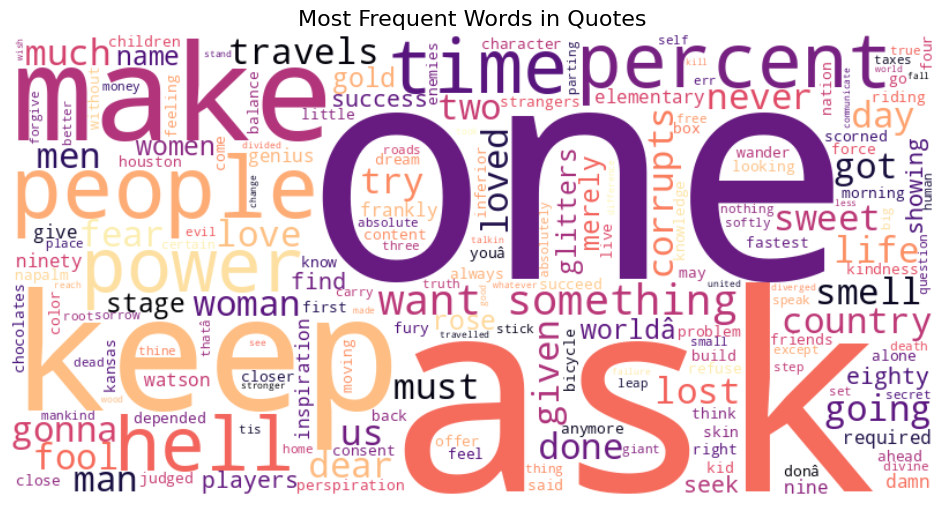

In [86]:
#Word Cloud style
# personally I think barplot is cleaner and more readable

from wordcloud import WordCloud

filtered_text = ' '.join(filtered_words)

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='magma').generate(filtered_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Quotes', fontsize=16)
plt.show()

### Lets create simple NN to generate quote

In [102]:
english_df = clean_df[clean_df['language'].str.lower() == 'english'].copy()

english_df['quote'] = english_df['quote'].astype(str).str.strip() + ' [END]'

len(english_df)

47

In [103]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences

text = ' '.join(english_df['quote'].astype(str)).lower()

chars = sorted(list(set(text)))
char_to_idx = {c: i for i, c in enumerate(chars)}
idx_to_char = {i: c for c, i in char_to_idx.items()}

vocab_size = len(chars)

seq_length = 40
step = 3

sequences = []
next_chars = []

for i in range(0, len(text) - seq_length, step):
    sequences.append(text[i: i + seq_length])
    next_chars.append(text[i + seq_length])

print(f"Number of sequences: {len(sequences)}")

X = np.zeros((len(sequences), seq_length, vocab_size), dtype=bool)
y = np.zeros((len(sequences), vocab_size), dtype=bool)

for i, seq in enumerate(sequences):
    for t, char in enumerate(seq):
        X[i, t, char_to_idx[char]] = 1
    y[i, char_to_idx[next_chars[i]]] = 1

Number of sequences: 883


In [104]:
model = Sequential()
model.add(LSTM(128, input_shape=(seq_length, vocab_size)))
model.add(Dense(vocab_size, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(0.005))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 128)            │        83,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 34)             │         4,386 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 87,842 (343.13 KB)

 Trainable params: 87,842 (343.13 KB)

 Non-trainable params: 0 (0.00 B)

In [105]:
model.fit(X, y, batch_size=128, epochs=30)

Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 3.3823
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 3.0449
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 2.9170
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 2.8640
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 2.8070
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 2.8091
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 2.7486
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 2.6231
Epoch 9/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 2.5304
Epoch 10/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - loss: 2.4484
Epoch 11/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 2.2431
Epoch 12/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 2.1891
Epoch 13/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 2.0437
Epoch 14/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 2.0342
Epoch 15/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 1.8950
Epoch 16/30
7/7 ━━━━━━━━━━━━━━━━

In [107]:
import random

def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds + 1e-8) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    return np.random.choice(len(preds), p=preds)

def generate_quote(seed=None, length=300, temperature=0.8):
    if seed is None:
        seed = random.choice(sequences)
    generated = seed
    for _ in range(length):
        x_pred = np.zeros((1, seq_length, vocab_size))
        for t, char in enumerate(seed):
            x_pred[0, t, char_to_idx.get(char, 0)] = 1
        preds = model.predict(x_pred, verbose=0)[0]
        next_index = sample(preds, temperature)
        next_char = idx_to_char[next_index]
        generated += next_char
        seed = generated[-seq_length:]

        if generated.endswith('[end]'):
            break

    return generated.replace('[end]', '').strip()

In [108]:
generate_quote()

'ugh hell, keep going.  if you build.'

In [ ]:
# reiterated model input for 3 times & increased epochs from 15 to 30 to get this output